# I] Import functions and options

In [1]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [3]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [4]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + "/ATG7/dataframes_for_input/"
ensembl_normal_atg7_proteinGE = pandas.read_csv(path+"ensembl_normal_atg7_proteinGE.tsv", sep = "\t")
ensembl_primary_atg7_proteinGE = pandas.read_csv(path+"ensembl_primary_atg7_proteinGE.tsv", sep = "\t")

print(ensembl_normal_atg7_proteinGE.shape)
print(ensembl_primary_atg7_proteinGE.shape)
ensembl_normal_atg7_proteinGE.head(2)

(7429, 19387)
(9185, 19387)
Wall time: 3min 39s


,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Muscle,5.042,3.860,2.390,14.0639,13.9595,13.8503,14.4453,15.0971,...,2.7868,5.6494,5.0193,2.694,4.5274,5.0998,2.3423,6.0790,6.4861,4.9700
1,Normal Tissue,Muscle,4.252,2.322,1.956,13.9265,13.5455,15.2642,14.3855,15.1867,...,9.3501,6.1104,6.0570,1.177,6.8792,6.4325,2.1013,6.7035,1.1706,1.3167


In [5]:
%%time
#download the protein coding list. will be useful with correlation results.
path = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(path, sep = "\t")
print(protein_coding_list.shape)
protein_coding_list.head()

(22796, 4)
Wall time: 41.9 ms


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding
3,ENSG00000198804,MT-CO1,4512.0,protein_coding
4,ENSG00000198712,MT-CO2,4513.0,protein_coding
5,ENSG00000228253,MT-ATP8,4509.0,protein_coding


# III] Expression correlation between ATG7 and the candidate genes

In [8]:
ensembl_normal_atg7_proteinGE.head()

,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Muscle,5.042,3.860,2.390,14.0639,13.9595,13.8503,14.4453,15.0971,...,2.7868,5.6494,5.0193,2.6940,4.5274,5.0998,2.3423,6.0790,6.4861,4.9700
1,Normal Tissue,Muscle,4.252,2.322,1.956,13.9265,13.5455,15.2642,14.3855,15.1867,...,9.3501,6.1104,6.0570,1.1770,6.8792,6.4325,2.1013,6.7035,1.1706,1.3167
2,Normal Tissue,Muscle,3.909,2.602,1.345,14.2878,14.1511,14.3722,13.8211,14.8161,...,9.0646,5.9750,5.1173,1.8683,4.6136,5.0090,2.0604,5.7848,1.7489,4.6514
3,Normal Tissue,Muscle,3.854,2.568,1.428,13.8853,14.2716,15.1167,14.0622,15.5897,...,9.2252,5.4941,5.5880,-0.4521,5.6631,6.3797,2.5683,7.3214,1.6140,1.5563
4,Normal Tissue,Muscle,3.822,2.164,1.293,12.9986,13.7570,14.4661,13.4082,14.0564,...,8.9779,6.1502,5.1330,2.0289,6.8202,6.1789,1.8524,6.7685,2.8838,1.8323


In [7]:
#to know the ensembl code for the candidates
protein_coding_list.loc[protein_coding_list['hgnc_symbol'] == 'YAP1']

,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
8373,ENSG00000137693,YAP1,10413.0,protein_coding


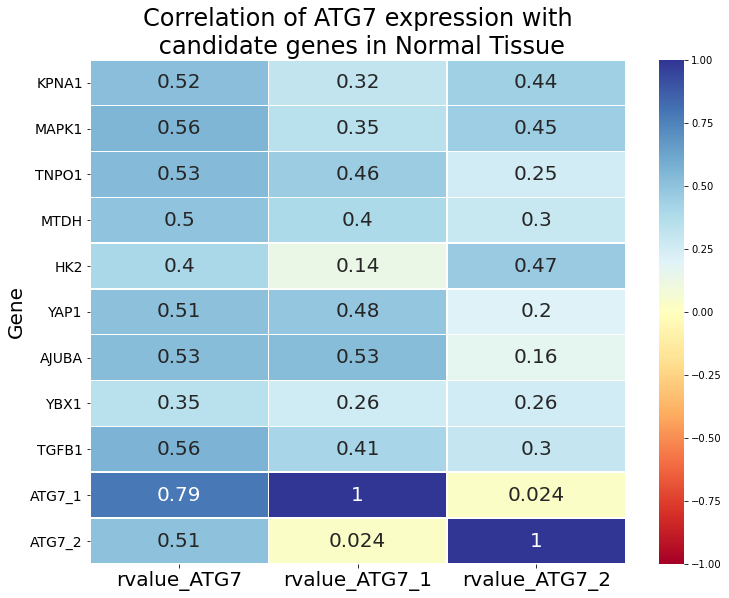

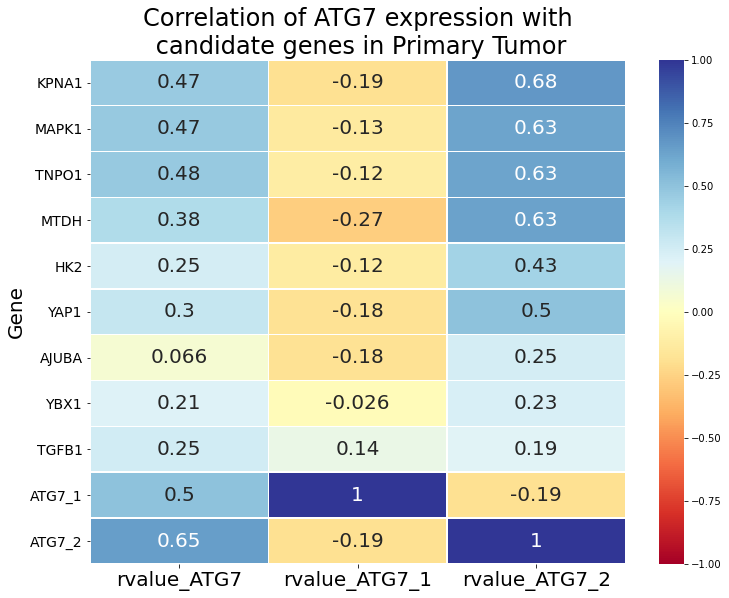

<Figure size 864x576 with 0 Axes>

In [34]:
# Spearman Correlation, main genes 
all_tissue_used = [[ensembl_normal_atg7_proteinGE,'Normal Tissue'], 
                   [ensembl_primary_atg7_proteinGE,'Primary Tumor']]

HK2 = 'ENSG00000159399'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
ATG7_1 = 'ATG7_1'
ATG7_2 = 'ATG7_2'
MTDH = 'ENSG00000147649'
MAPK1 = 'ENSG00000100030'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'

for tissue in all_tissue_used:
    gene_list_t = []
    rvalue_list_t = []
    pvalue_list_t = []

    gene_list_1 = []
    rvalue_list_1 = []
    pvalue_list_1 = []

    gene_list_2 = []
    rvalue_list_2 = []
    pvalue_list_2 = []

    genes_x = [[KPNA1,'KPNA1'], [MAPK1, 'MAPK1'], [TNPO1,'TNPO1'], [MTDH,'MTDH'], 
             [HK2, "HK2"], [YAP1, 'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], 
             [TGFB1,'TGFB1'], [ATG7_1,'ATG7_1'], [ATG7_2,'ATG7_2']]

    for gene in genes_x:
        x = tissue[0][gene[0]].to_list()
        y = tissue[0]['ATG7'].to_list()
        y1 = tissue[0]['ATG7_1'].to_list()
        y2 = tissue[0]['ATG7_2'].to_list()  

        r_value, p_value = scipy.stats.spearmanr(x, y)
        gene_list_t.append(gene[1])
        rvalue_list_t.append(r_value)
        pvalue_list_t.append(p_value)

        r_value, p_value = scipy.stats.spearmanr(x, y1)
        gene_list_1.append(gene[1])
        rvalue_list_1.append(r_value)
        pvalue_list_1.append(p_value)

        r_value, p_value = scipy.stats.spearmanr(x, y2)
        gene_list_2.append(gene[1])
        rvalue_list_2.append(r_value)
        pvalue_list_2.append(p_value)
        
    #create a dictionnary
    d_t = dict(Gene = gene_list_t, rvalue = rvalue_list_t, pvalue= pvalue_list_t)
    d_1 = dict(Gene = gene_list_1, rvalue = rvalue_list_1, pvalue= pvalue_list_1)
    d_2 = dict(Gene = gene_list_2, rvalue = rvalue_list_2, pvalue= pvalue_list_2)
    all_dictio = d_t, d_1, d_2

    d = dict(Gene = gene_list_t, rvalue_ATG7 = rvalue_list_t,
                                 rvalue_ATG7_1 = rvalue_list_1, 
                                 rvalue_ATG7_2 = rvalue_list_2)

    candidate_corr = pandas.DataFrame.from_dict(d, orient='index')
    candidate_corr = candidate_corr.T
    candidate_corr.set_index('Gene', drop=True, inplace=True)

    candidate_corr = candidate_corr.assign(rvalue_ATG7 = candidate_corr['rvalue_ATG7'].astype(float),
                                           rvalue_ATG7_1 = candidate_corr['rvalue_ATG7_1'].astype(float), 
                                           rvalue_ATG7_2 = candidate_corr['rvalue_ATG7_2'].astype(float))

    heatmap = seaborn.heatmap(candidate_corr, annot=True, cmap="RdYlBu", vmin=-1, vmax=1, linewidths=.5)
    plt.title('Correlation of ATG7 expression with\n candidate genes in '+ tissue[1])
    plt.yticks(rotation=0, fontsize=14)
    plt.subplots_adjust(top=1)
    plt.show()
    plt.clf()

Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and ATG7 is: r_value = 0.78 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7 is: r_value = 0.49 for a p_value of 0.00e+00


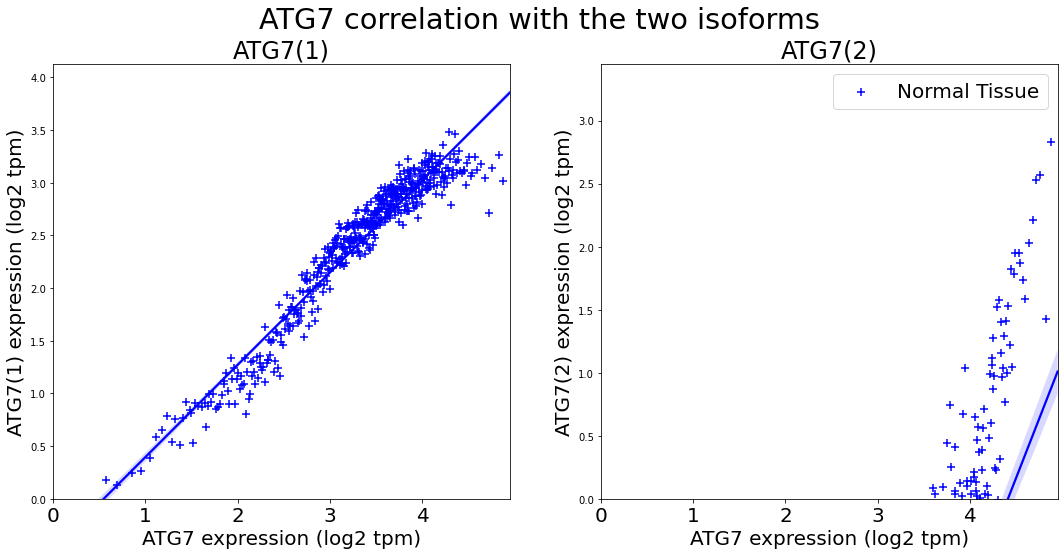

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and ATG7 is: r_value = 0.49 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7 is: r_value = 0.64 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

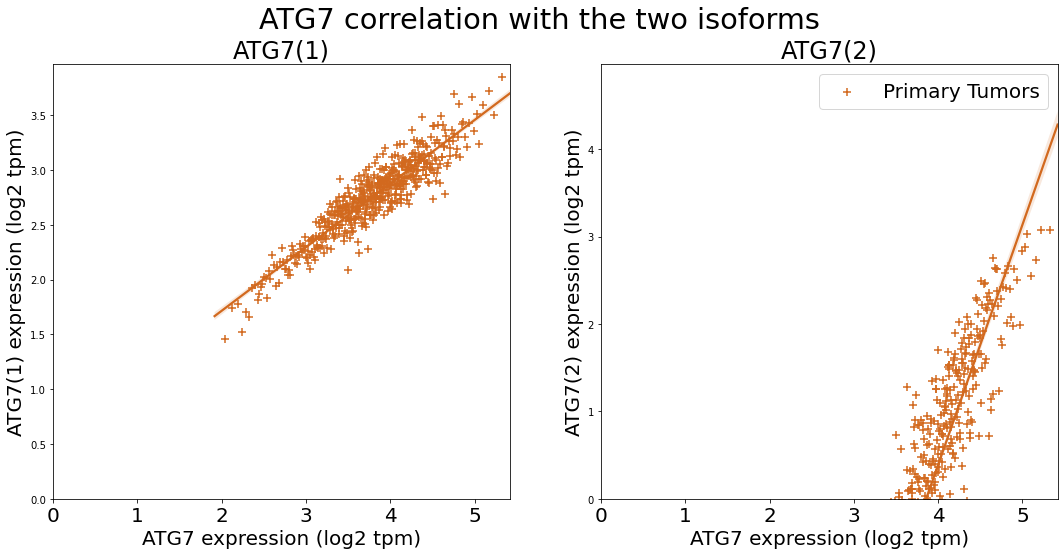


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and ATG7_1 is: r_value = 1.00 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7_1 is: r_value = 0.01 for a p_value of 2.17e-01


<Figure size 864x576 with 0 Axes>

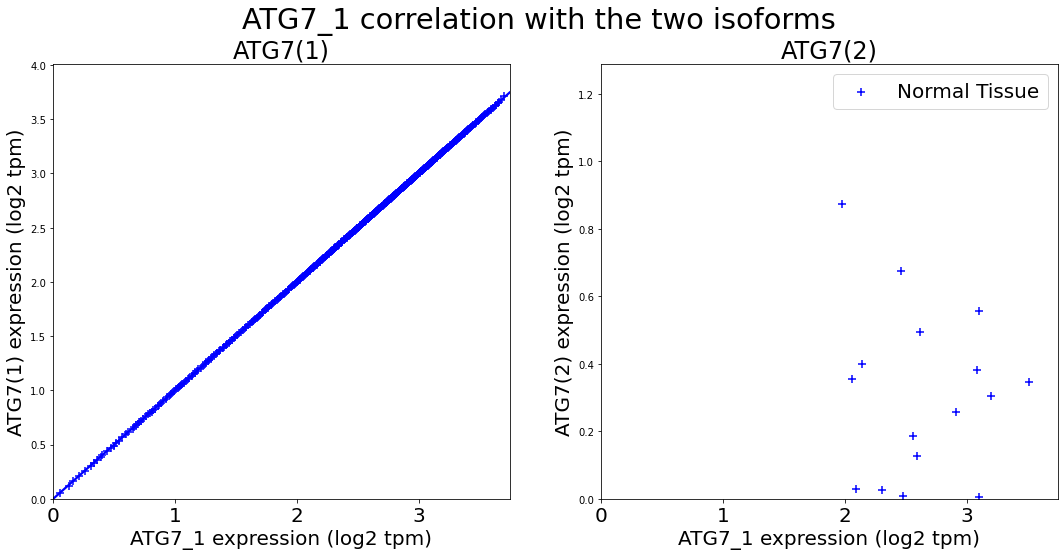

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and ATG7_1 is: r_value = 1.00 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7_1 is: r_value = -0.19 for a p_value of 2.10e-76


<Figure size 864x576 with 0 Axes>

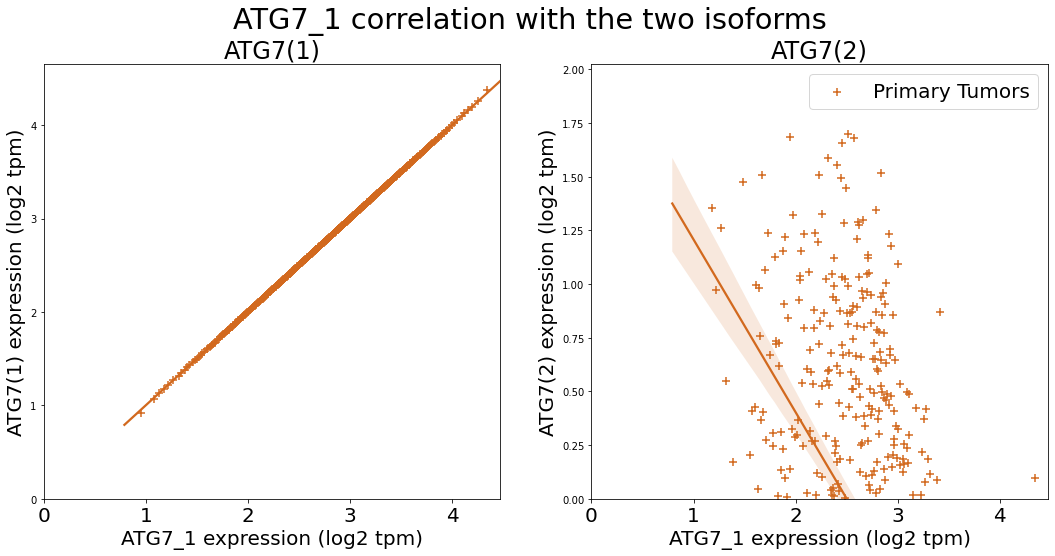


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and MAPK1 is: r_value = 0.34 for a p_value of 2.03e-197
  correlation between ATG7_2 and MAPK1 is: r_value = 0.44 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

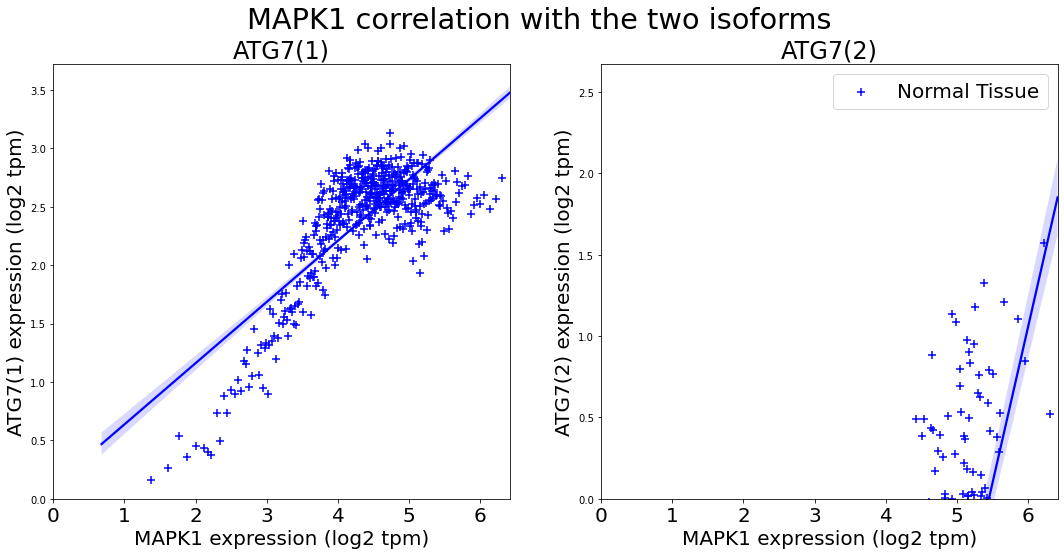

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and MAPK1 is: r_value = -0.14 for a p_value of 1.62e-39
  correlation between ATG7_2 and MAPK1 is: r_value = 0.63 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

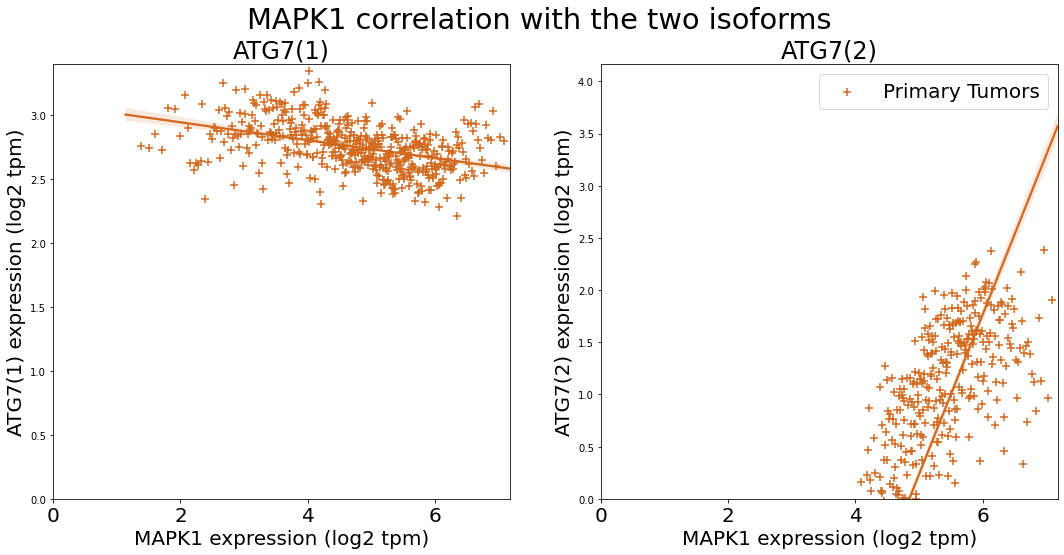


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and MTDH is: r_value = 0.39 for a p_value of 2.11e-263
  correlation between ATG7_2 and MTDH is: r_value = 0.29 for a p_value of 8.55e-140


<Figure size 864x576 with 0 Axes>

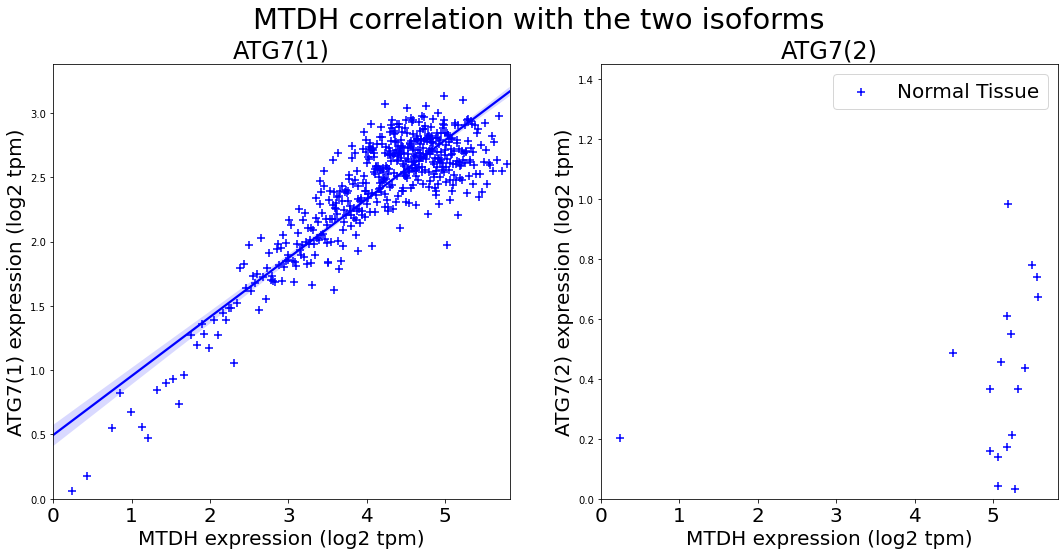

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and MTDH is: r_value = -0.28 for a p_value of 1.61e-164
  correlation between ATG7_2 and MTDH is: r_value = 0.63 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

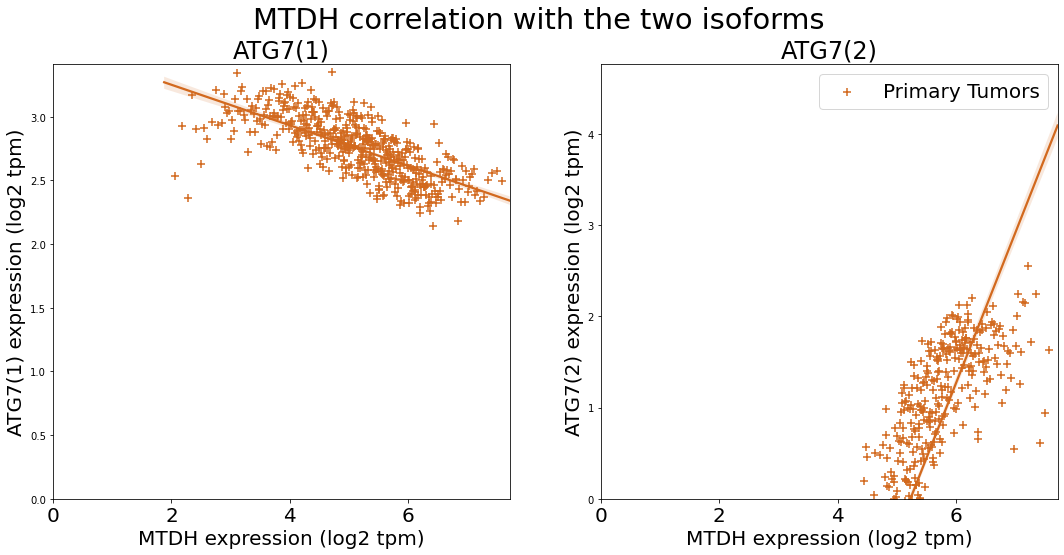


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and KPNA1 is: r_value = 0.32 for a p_value of 4.26e-175
  correlation between ATG7_2 and KPNA1 is: r_value = 0.43 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

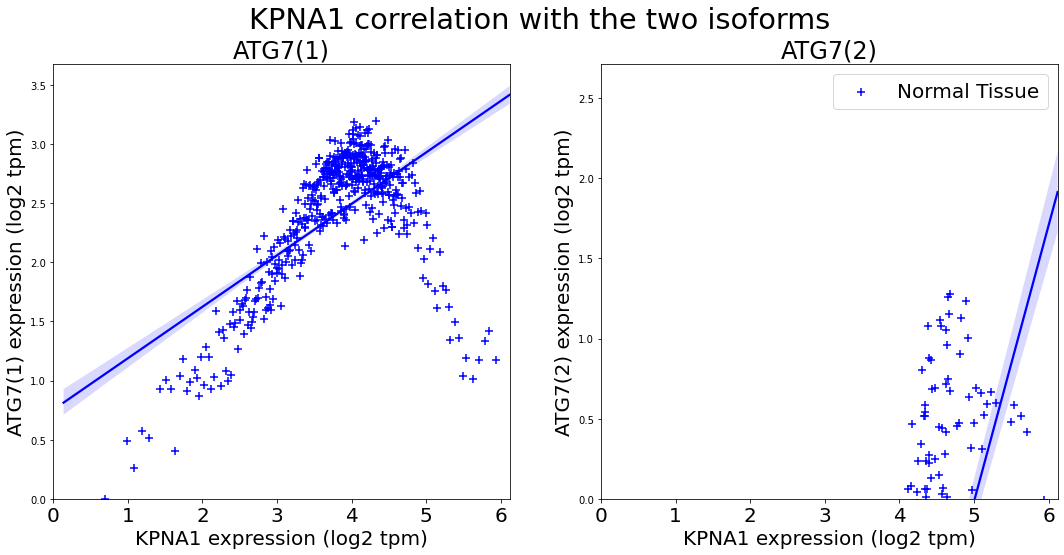

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and KPNA1 is: r_value = -0.18 for a p_value of 1.22e-70
  correlation between ATG7_2 and KPNA1 is: r_value = 0.67 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

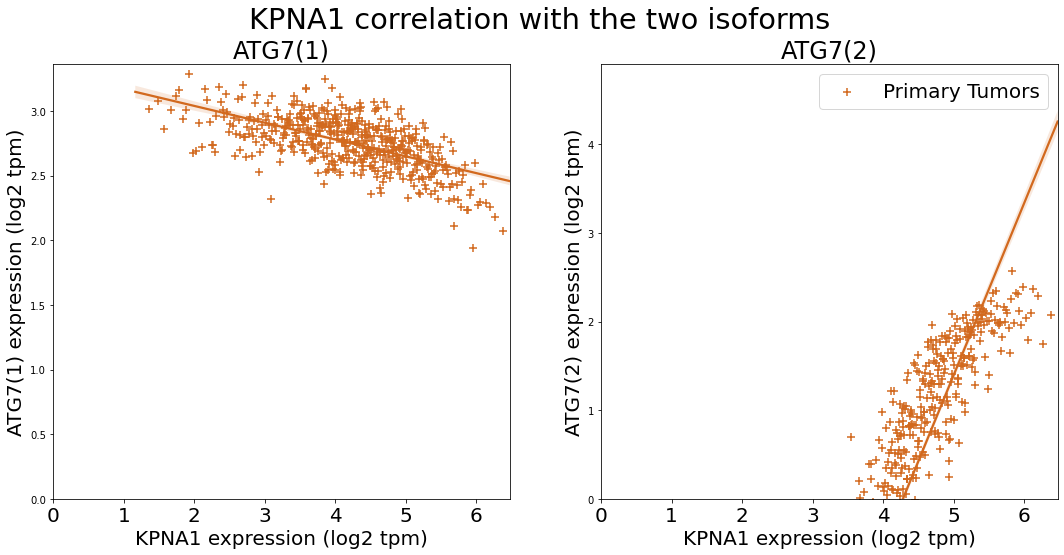


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and TNPO1 is: r_value = 0.45 for a p_value of 0.00e+00
  correlation between ATG7_2 and TNPO1 is: r_value = 0.23 for a p_value of 1.31e-92


<Figure size 864x576 with 0 Axes>

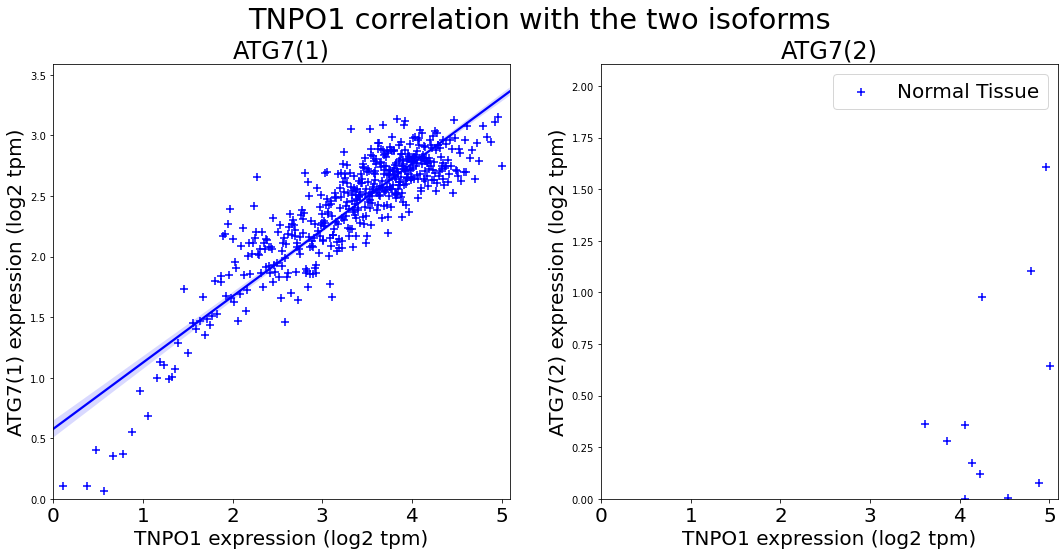

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and TNPO1 is: r_value = -0.11 for a p_value of 2.47e-27
  correlation between ATG7_2 and TNPO1 is: r_value = 0.63 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

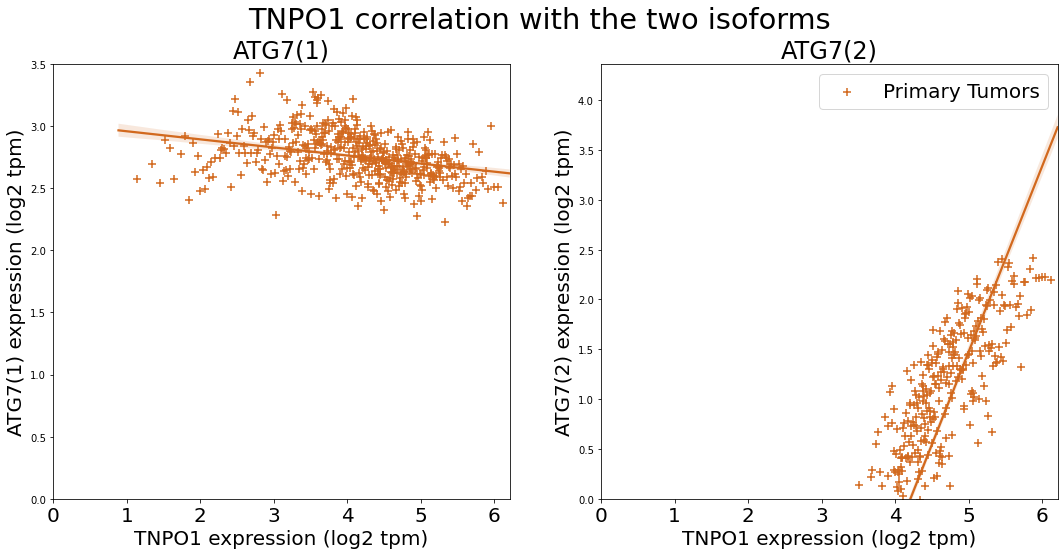


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and HK2 is: r_value = 0.13 for a p_value of 1.83e-30
  correlation between ATG7_2 and HK2 is: r_value = 0.46 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

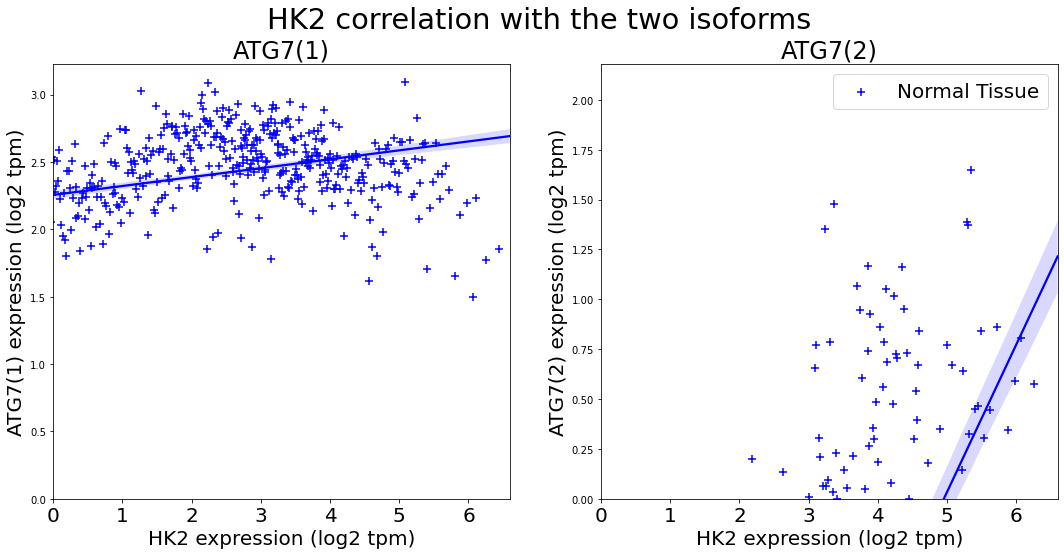

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and HK2 is: r_value = -0.13 for a p_value of 1.68e-33
  correlation between ATG7_2 and HK2 is: r_value = 0.42 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

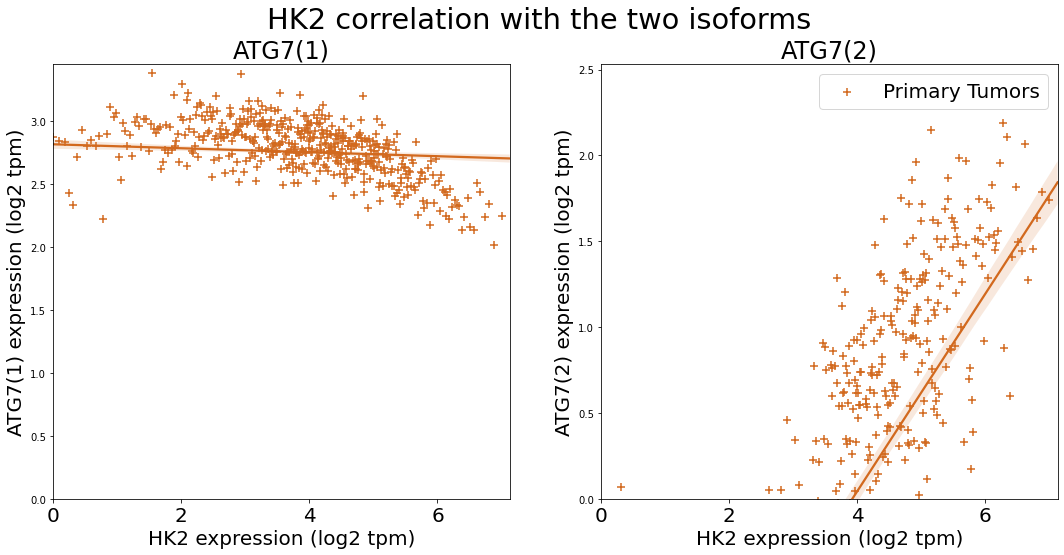


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and YAP1 is: r_value = 0.47 for a p_value of 0.00e+00
  correlation between ATG7_2 and YAP1 is: r_value = 0.20 for a p_value of 4.01e-65


<Figure size 864x576 with 0 Axes>

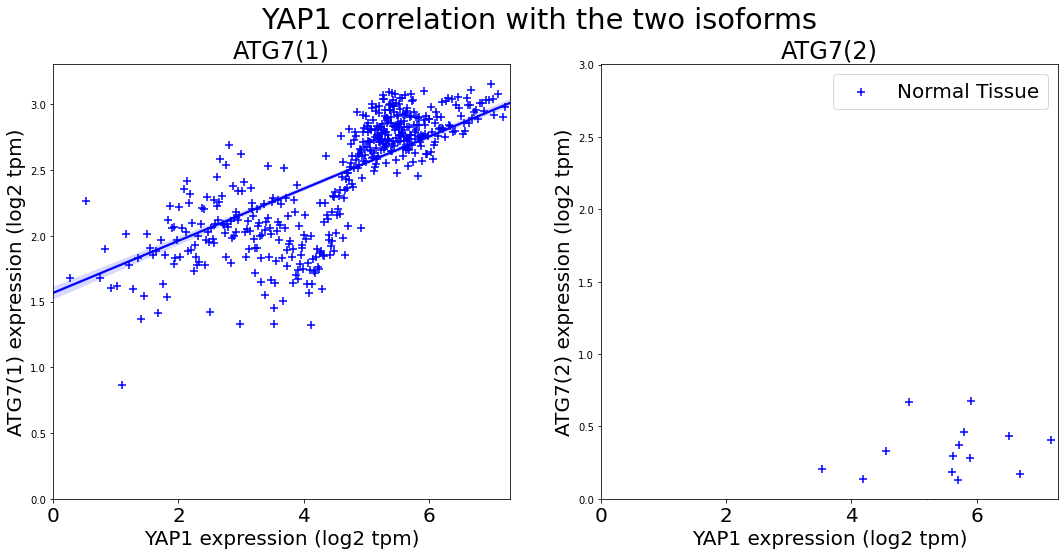

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and YAP1 is: r_value = -0.18 for a p_value of 1.40e-66
  correlation between ATG7_2 and YAP1 is: r_value = 0.50 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

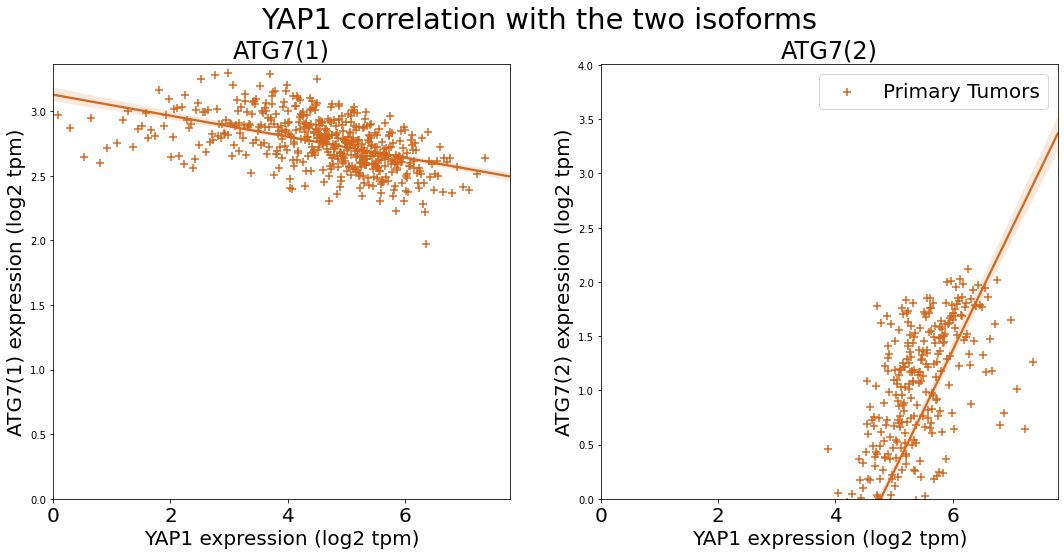


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and AJUBA is: r_value = 0.52 for a p_value of 0.00e+00
  correlation between ATG7_2 and AJUBA is: r_value = 0.15 for a p_value of 5.49e-39


<Figure size 864x576 with 0 Axes>

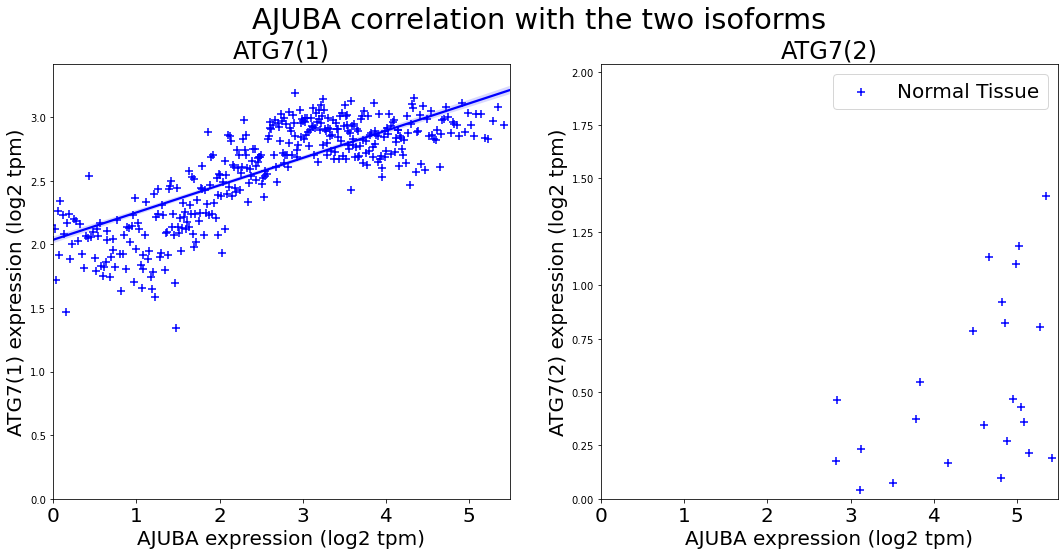

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and AJUBA is: r_value = -0.18 for a p_value of 6.73e-68
  correlation between ATG7_2 and AJUBA is: r_value = 0.25 for a p_value of 7.23e-126


<Figure size 864x576 with 0 Axes>

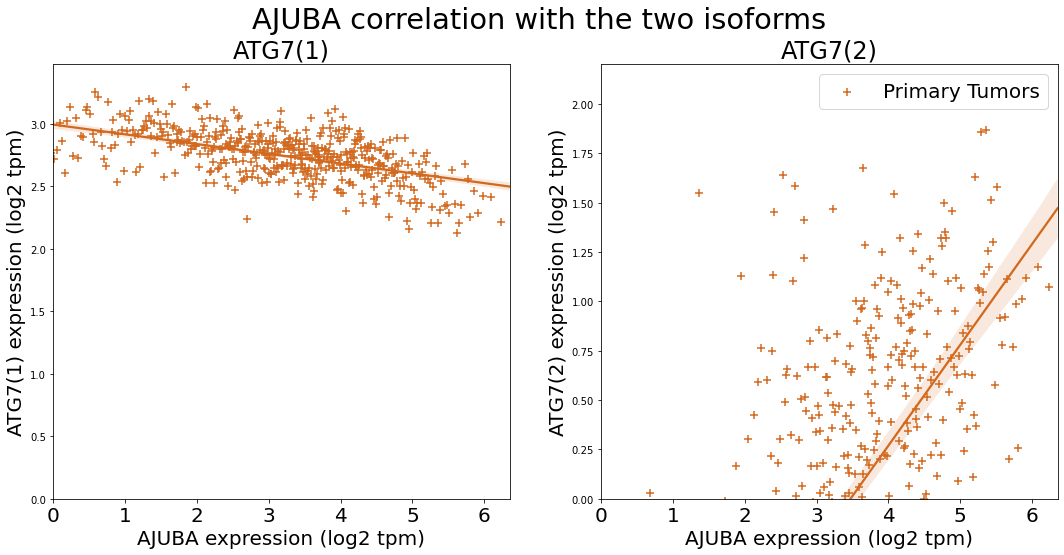


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and YBX1 is: r_value = 0.25 for a p_value of 6.09e-103
  correlation between ATG7_2 and YBX1 is: r_value = 0.24 for a p_value of 2.07e-96


<Figure size 864x576 with 0 Axes>

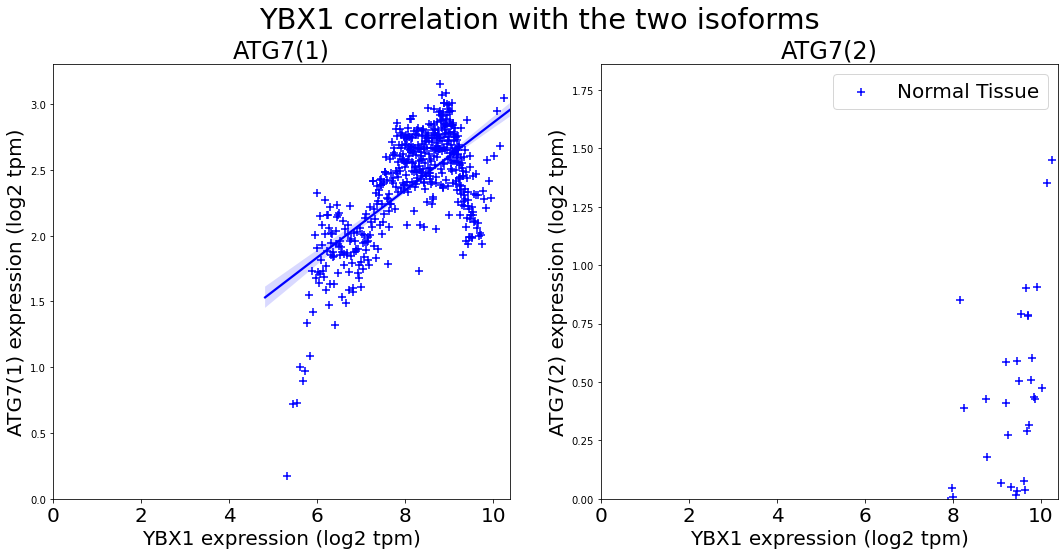

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and YBX1 is: r_value = -0.03 for a p_value of 9.42e-03
  correlation between ATG7_2 and YBX1 is: r_value = 0.23 for a p_value of 5.19e-105


<Figure size 864x576 with 0 Axes>

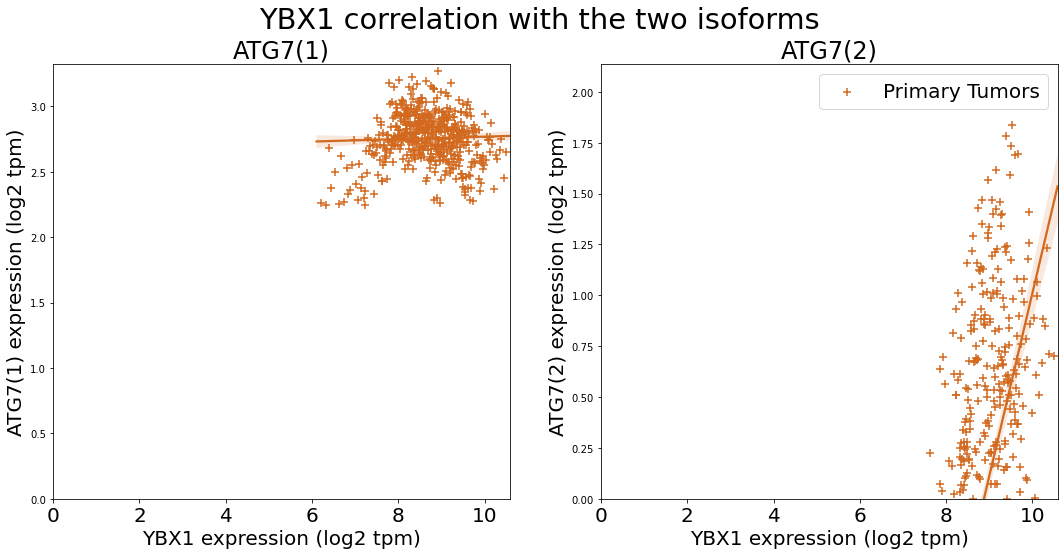


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and TGFB1 is: r_value = 0.41 for a p_value of 8.81e-298
  correlation between ATG7_2 and TGFB1 is: r_value = 0.29 for a p_value of 4.62e-139


<Figure size 864x576 with 0 Axes>

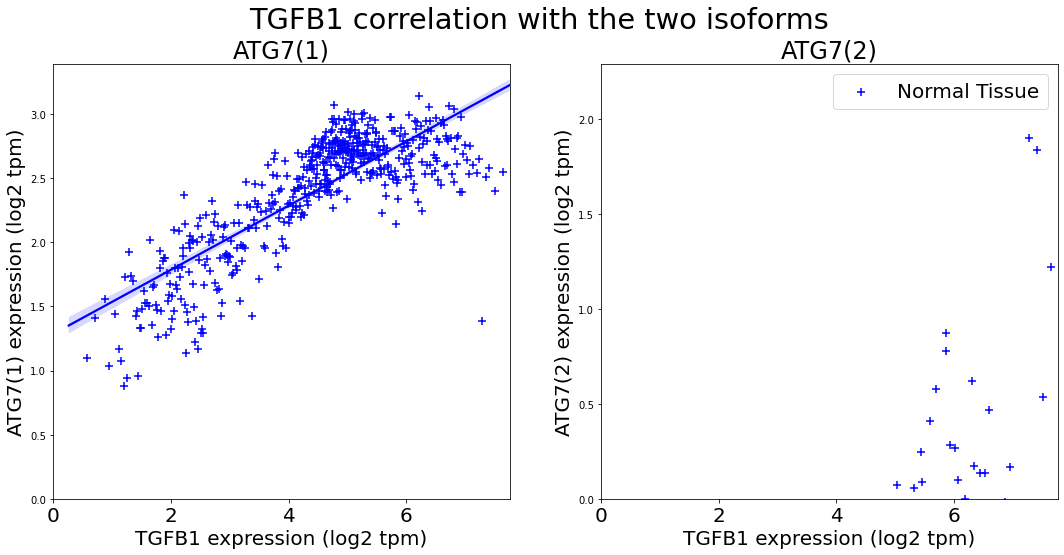

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and TGFB1 is: r_value = 0.13 for a p_value of 2.49e-35
  correlation between ATG7_2 and TGFB1 is: r_value = 0.19 for a p_value of 8.26e-72


<Figure size 864x576 with 0 Axes>

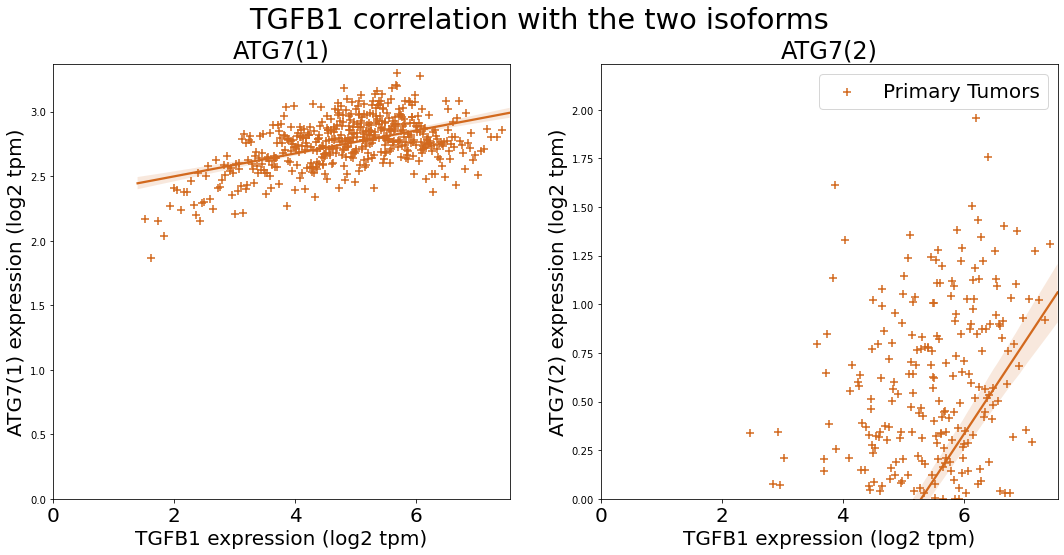

<Figure size 864x576 with 0 Axes>

In [11]:
#Graphic representation, two graphs in one, remove the extremities to have better graph 
## START FROM ZERO
all_tissue_used = [[ensembl_normal_atg7_proteinGE,'Normal Tissue', 'blue'], 
                   [ensembl_primary_atg7_proteinGE,'Primary Tumors', 'chocolate']]

HK2 = 'ENSG00000159399'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
MAPK1 = 'ENSG00000100030'
MTDH = 'ENSG00000147649'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'
ATG7 = 'ATG7'
ATG7_1 = 'ATG7_1'
 
genes = [[ATG7,'ATG7'], [ATG7_1,'ATG7_1'], [MAPK1,'MAPK1'], [MTDH,'MTDH'], [KPNA1,'KPNA1'], 
         [TNPO1,'TNPO1'], [HK2,'HK2'], [YAP1,'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], [TGFB1,'TGFB1']]

for gene in genes:
    for df in all_tissue_used:
        #sort by value, remove the extremities
        print(df[1], ':', df[0].shape)
        for_genes = df[0].sort_values([gene[0]], ascending = False) 
        lenght = len(for_genes)
        without_05perc = int(lenght*0.005)
        print('', without_05perc, 'are removed from head and tail')
        without_head = without_05perc
        without_tail = lenght - without_05perc
                
        df_no_extrem = for_genes.iloc[without_head:without_tail,:]
        print(' without extremities:', df_no_extrem.shape)
        print()
        
        x = df_no_extrem[gene[0]].to_list()
        y1 = df_no_extrem['ATG7_1'].to_list()
        y2 = df_no_extrem['ATG7_2'].to_list()
        
        print(df[1])
        r_value, p_value = scipy.stats.spearmanr(x, y1)
        print('  correlation between ATG7_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
        r_value, p_value = scipy.stats.spearmanr(x, y2)
        print('  correlation between ATG7_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
        
        #graph
        fig, ax = plt.subplots(1,2, figsize=(18,8))
        name = gene[1]+ " correlation with the two isoforms"
        name2 = gene[1]+ " expression (log2 tpm)"

        fig.suptitle(name, fontsize="x-large")
 
        fig = seaborn.regplot(x=x,y=y1, ax=ax[0], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
        fig.set_title("ATG7(1)")
        fig.set_xlim(0,)
        fig.set_xlabel(name2)
        fig.set_ylim(0,)
        fig.set_ylabel('ATG7(1) expression (log2 tpm)')

        fig = seaborn.regplot(x=x,y=y2, ax=ax[1], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
        fig.set_title("ATG7(2)")
        fig.set_xlim(0,)
        fig.set_xlabel(name2)
        fig.set_ylim(0,)
        fig.set_ylabel('ATG7(2) expression (log2 tpm)')
        
        plt.legend()
        plt.show()
        plt.clf()
    print()

Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and ATG7 is: r_value = 0.78 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7 is: r_value = 0.49 for a p_value of 0.00e+00


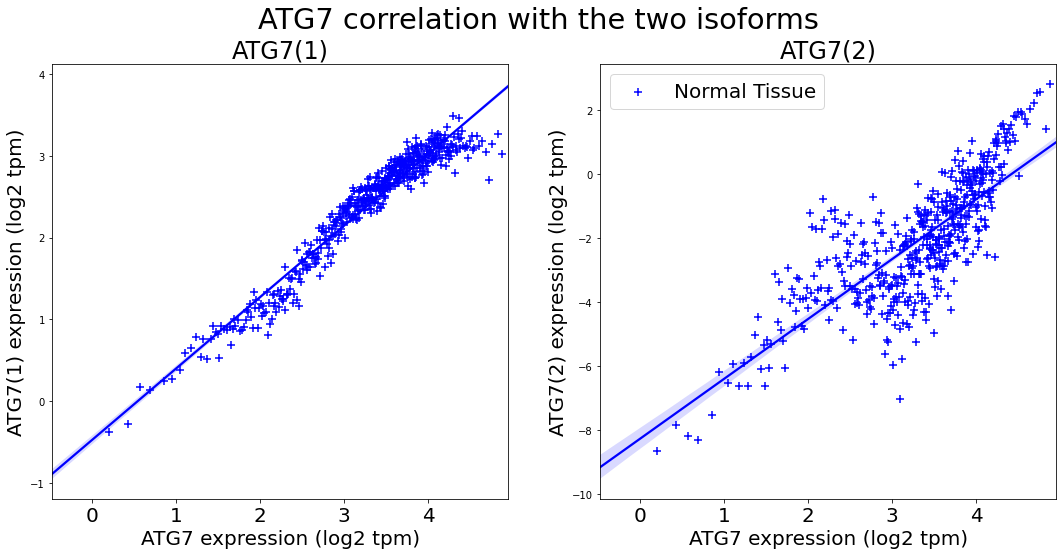

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and ATG7 is: r_value = 0.49 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7 is: r_value = 0.64 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

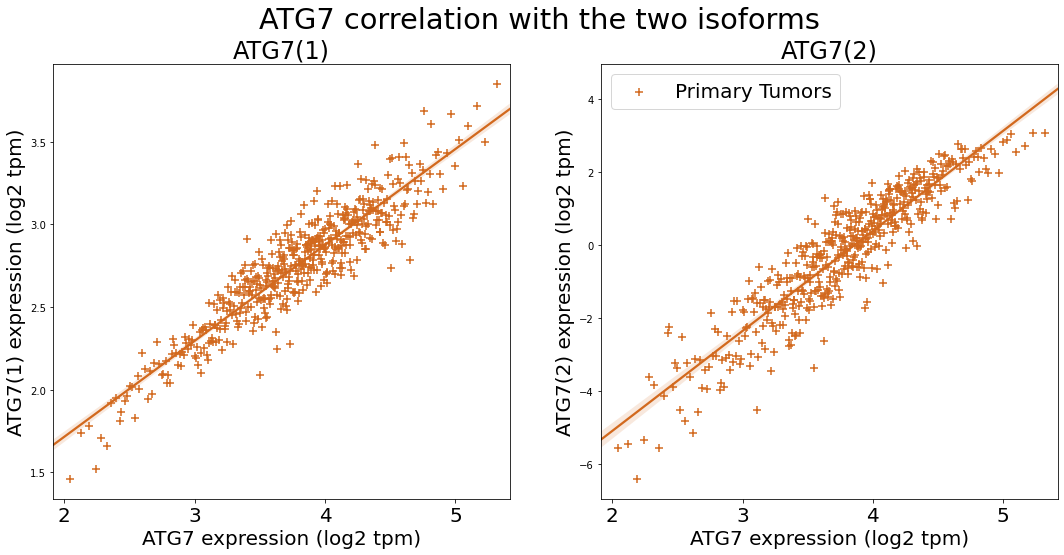


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and ATG7_1 is: r_value = 1.00 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7_1 is: r_value = 0.01 for a p_value of 2.17e-01


<Figure size 864x576 with 0 Axes>

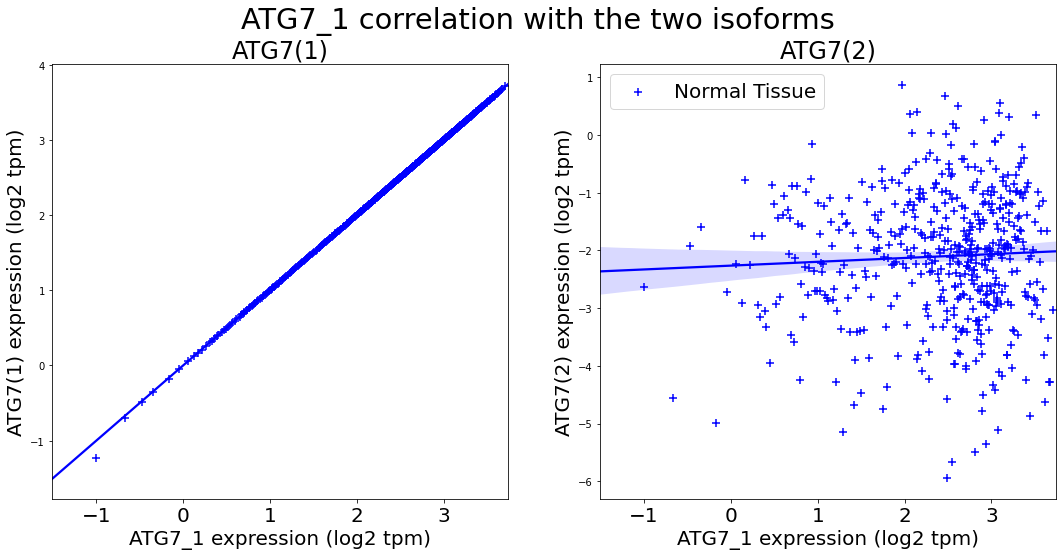

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and ATG7_1 is: r_value = 1.00 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7_1 is: r_value = -0.19 for a p_value of 2.10e-76


<Figure size 864x576 with 0 Axes>

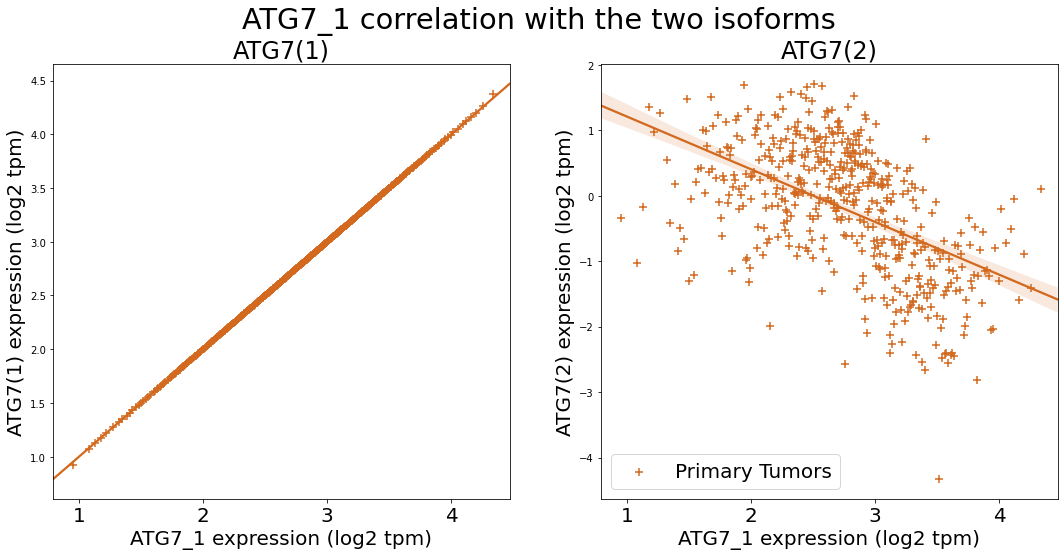


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and MAPK1 is: r_value = 0.34 for a p_value of 2.03e-197
  correlation between ATG7_2 and MAPK1 is: r_value = 0.44 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

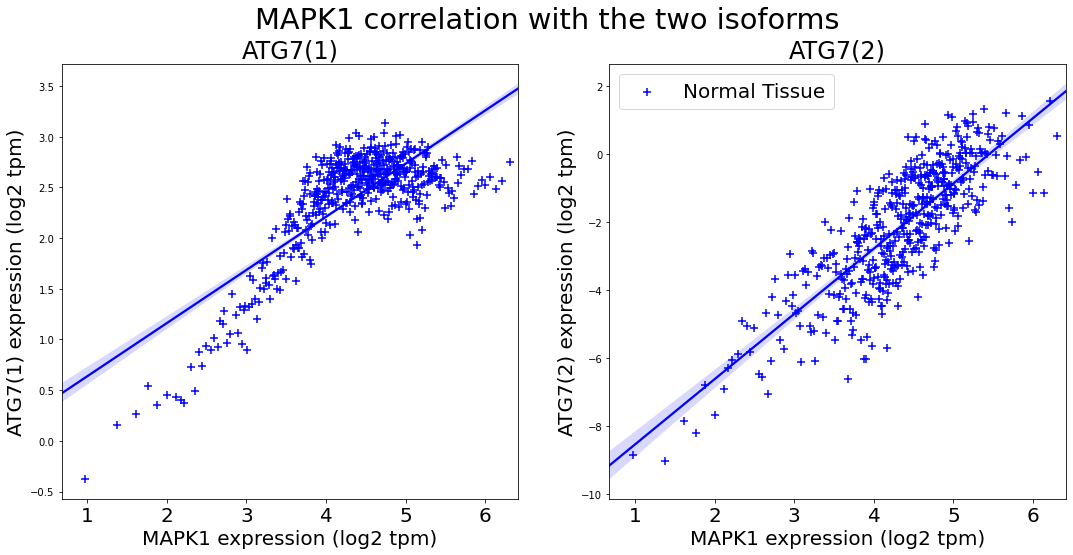

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and MAPK1 is: r_value = -0.14 for a p_value of 1.62e-39
  correlation between ATG7_2 and MAPK1 is: r_value = 0.63 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

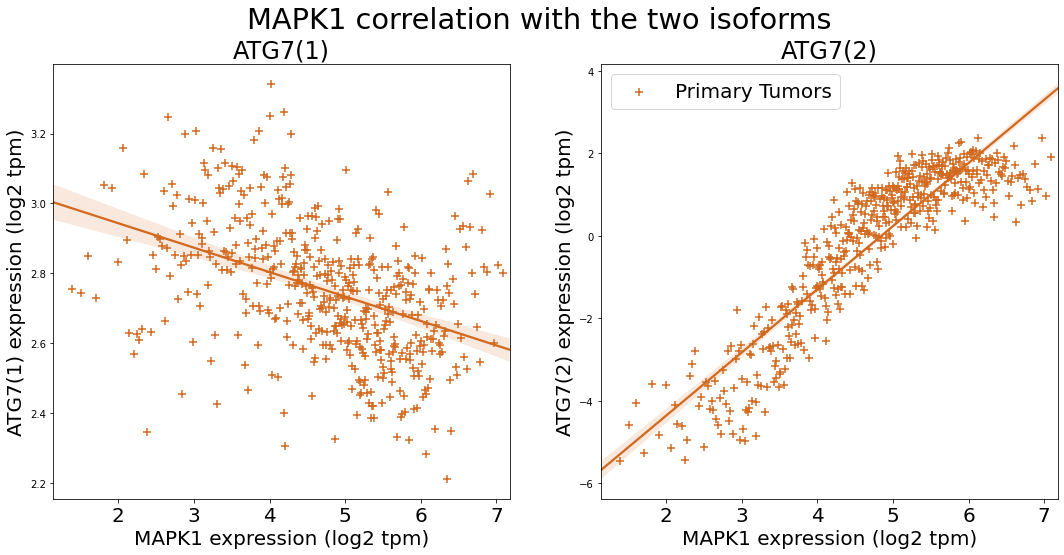


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and MTDH is: r_value = 0.39 for a p_value of 2.11e-263
  correlation between ATG7_2 and MTDH is: r_value = 0.29 for a p_value of 8.55e-140


<Figure size 864x576 with 0 Axes>

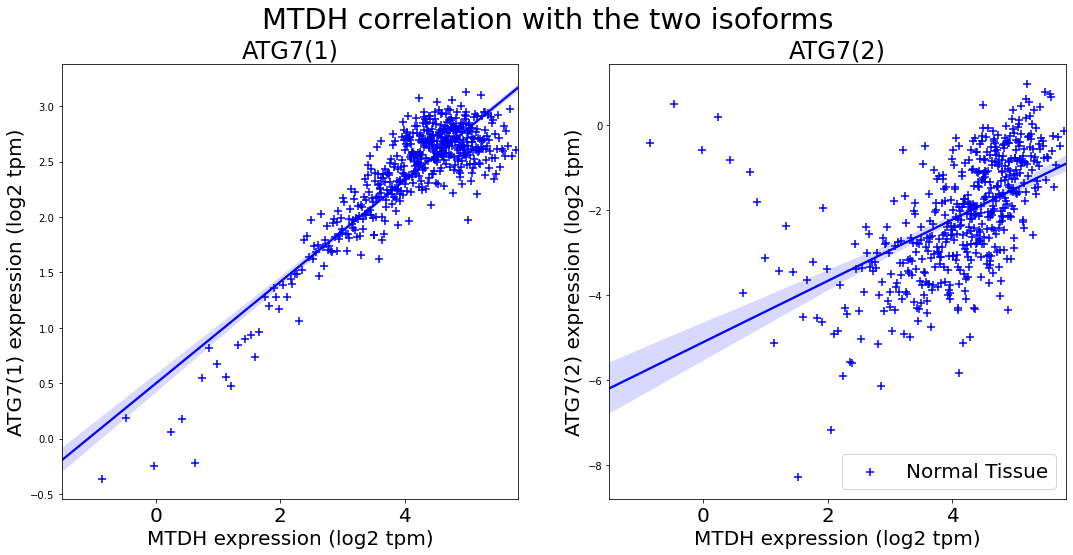

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and MTDH is: r_value = -0.28 for a p_value of 1.61e-164
  correlation between ATG7_2 and MTDH is: r_value = 0.63 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

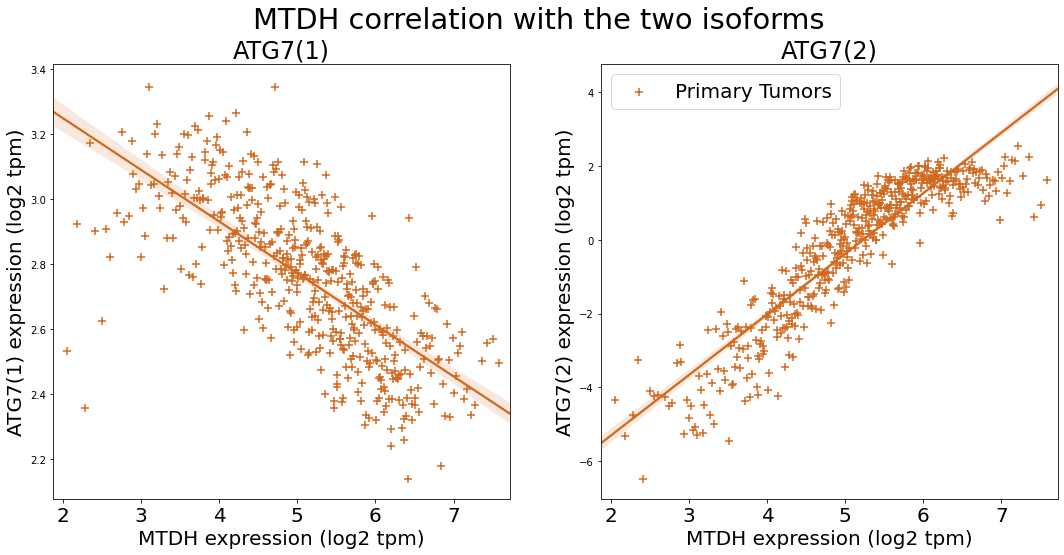


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and KPNA1 is: r_value = 0.32 for a p_value of 4.26e-175
  correlation between ATG7_2 and KPNA1 is: r_value = 0.43 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

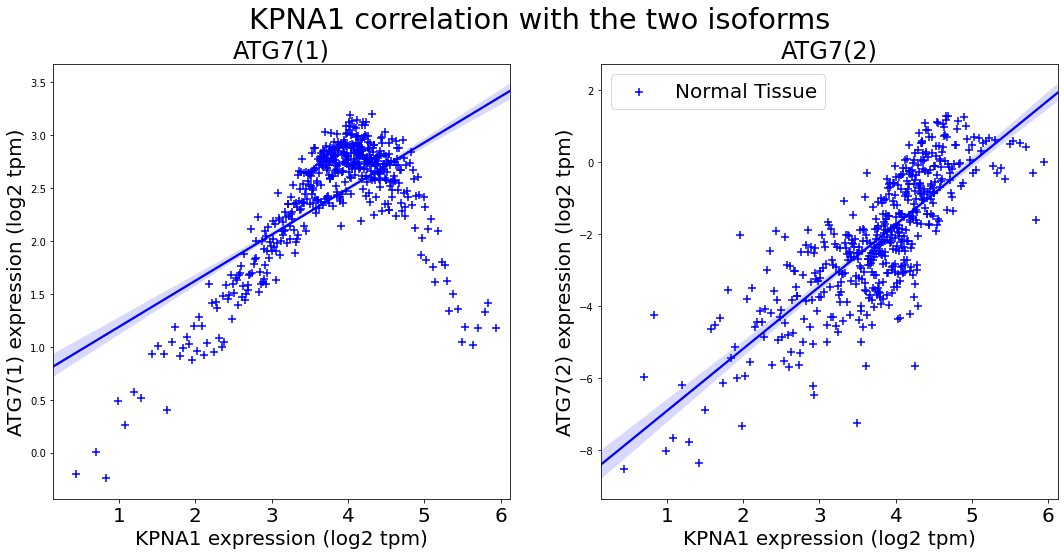

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and KPNA1 is: r_value = -0.18 for a p_value of 1.22e-70
  correlation between ATG7_2 and KPNA1 is: r_value = 0.67 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

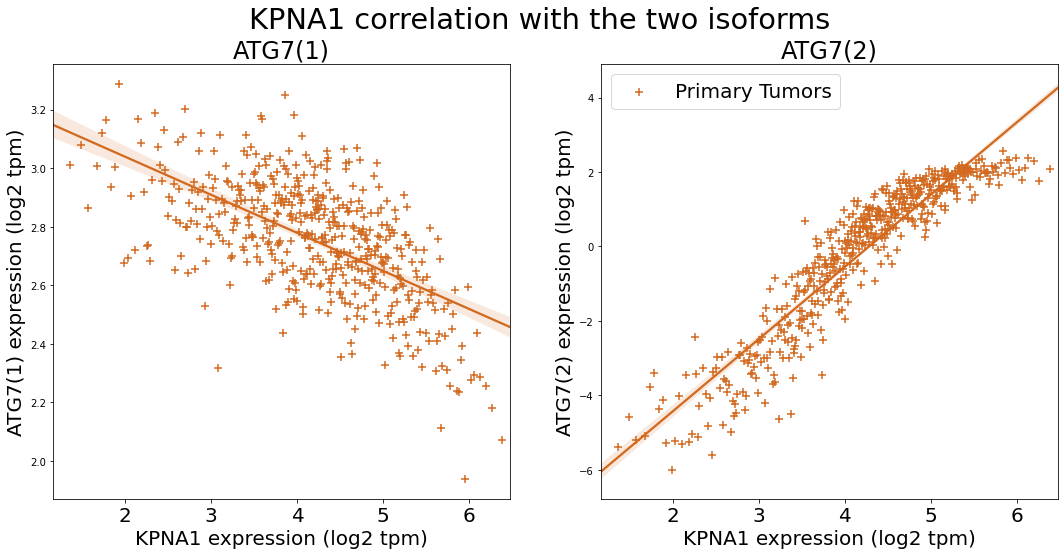


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and TNPO1 is: r_value = 0.45 for a p_value of 0.00e+00
  correlation between ATG7_2 and TNPO1 is: r_value = 0.23 for a p_value of 1.31e-92


<Figure size 864x576 with 0 Axes>

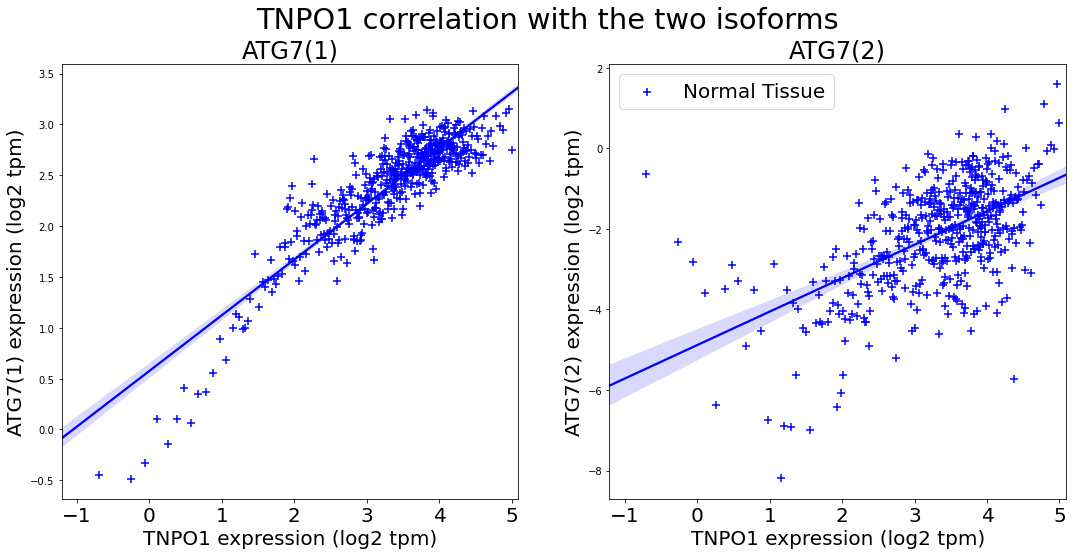

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and TNPO1 is: r_value = -0.11 for a p_value of 2.47e-27
  correlation between ATG7_2 and TNPO1 is: r_value = 0.63 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

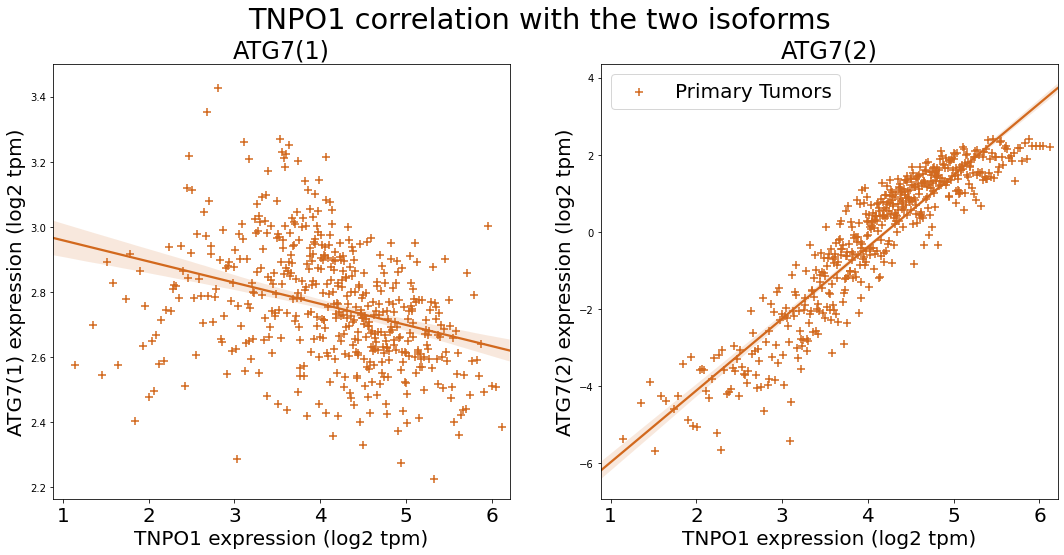


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and HK2 is: r_value = 0.13 for a p_value of 1.83e-30
  correlation between ATG7_2 and HK2 is: r_value = 0.46 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

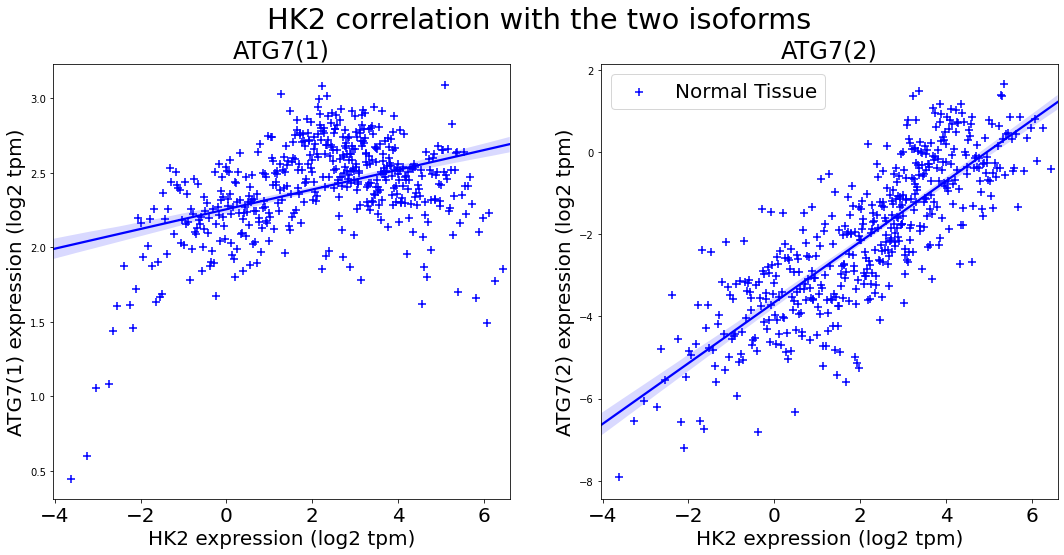

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and HK2 is: r_value = -0.13 for a p_value of 1.68e-33
  correlation between ATG7_2 and HK2 is: r_value = 0.42 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

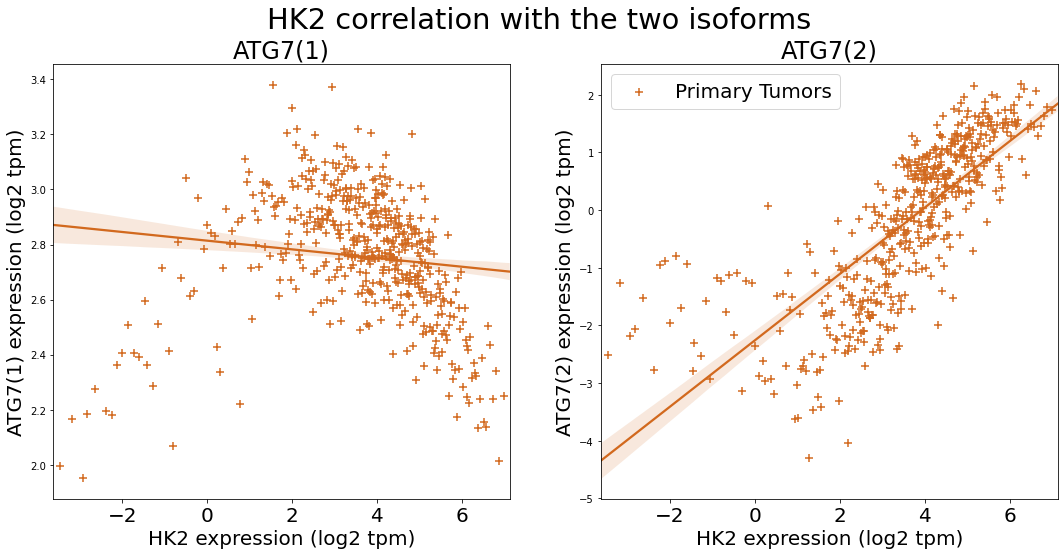


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and YAP1 is: r_value = 0.47 for a p_value of 0.00e+00
  correlation between ATG7_2 and YAP1 is: r_value = 0.20 for a p_value of 4.01e-65


<Figure size 864x576 with 0 Axes>

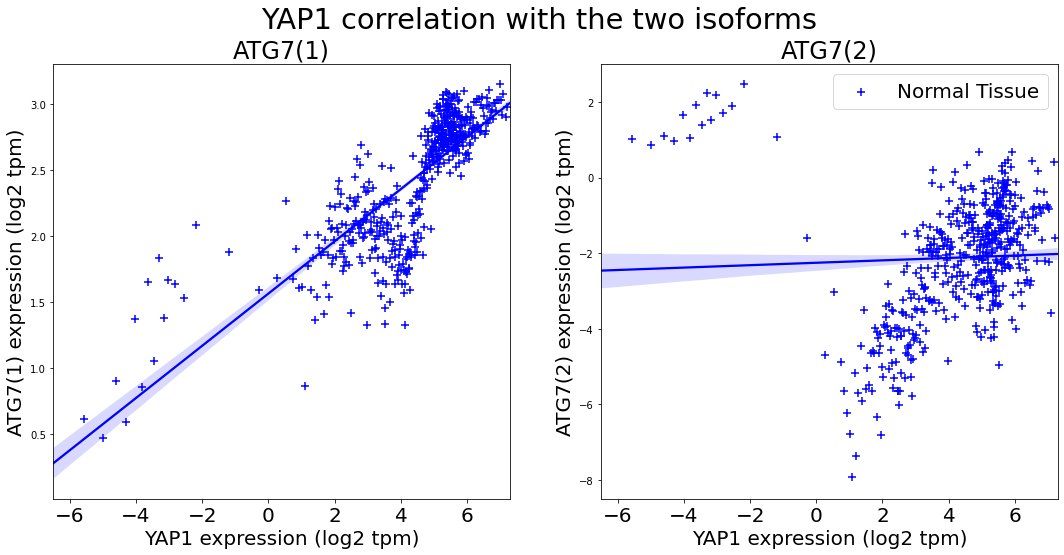

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and YAP1 is: r_value = -0.18 for a p_value of 1.40e-66
  correlation between ATG7_2 and YAP1 is: r_value = 0.50 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

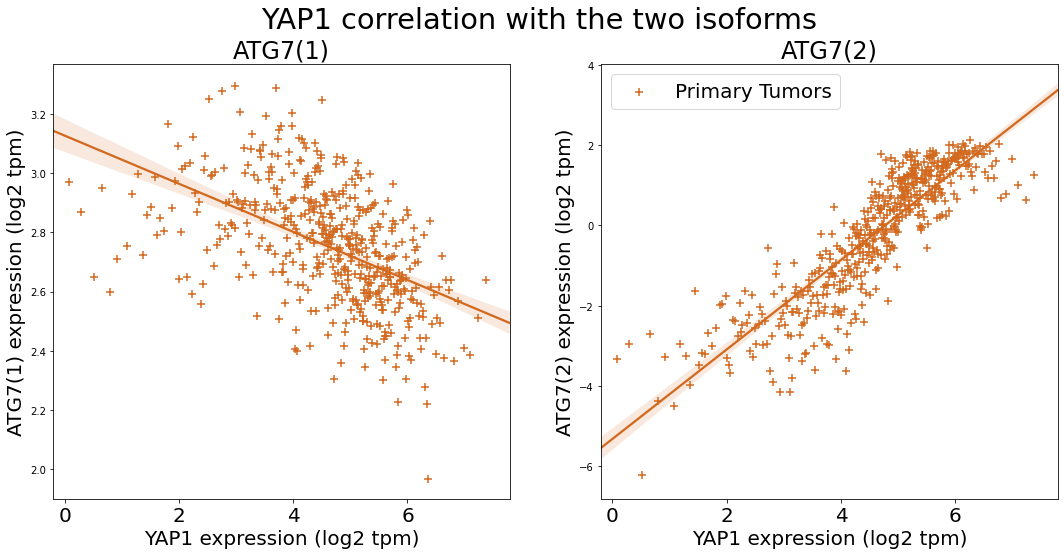


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and AJUBA is: r_value = 0.52 for a p_value of 0.00e+00
  correlation between ATG7_2 and AJUBA is: r_value = 0.15 for a p_value of 5.49e-39


<Figure size 864x576 with 0 Axes>

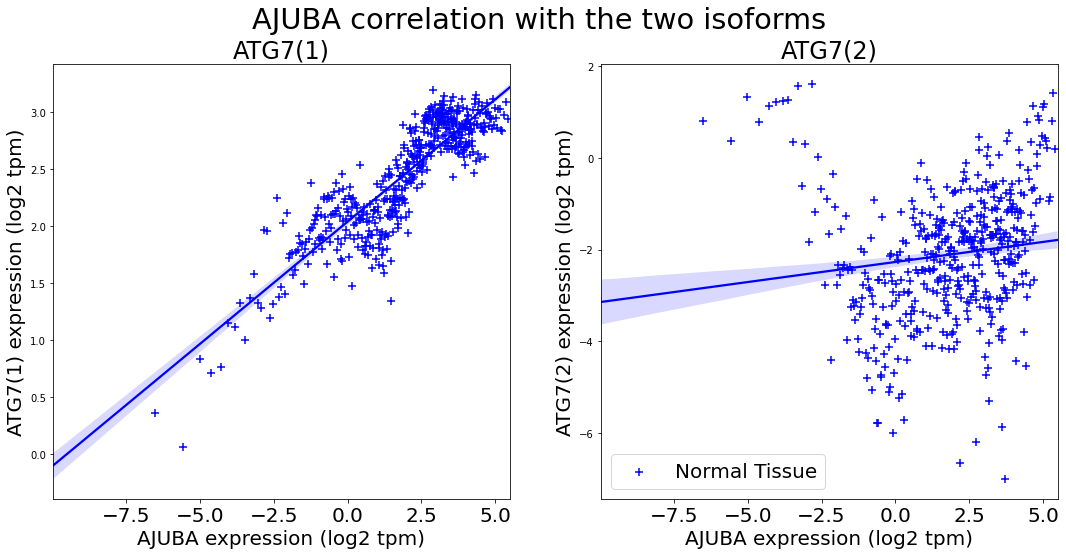

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and AJUBA is: r_value = -0.18 for a p_value of 6.73e-68
  correlation between ATG7_2 and AJUBA is: r_value = 0.25 for a p_value of 7.23e-126


<Figure size 864x576 with 0 Axes>

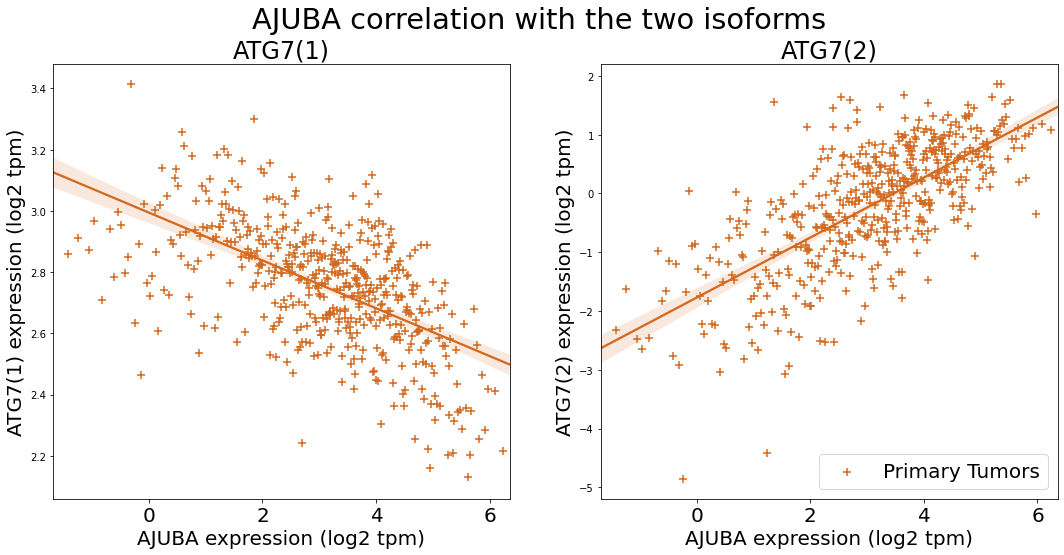


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and YBX1 is: r_value = 0.25 for a p_value of 6.09e-103
  correlation between ATG7_2 and YBX1 is: r_value = 0.24 for a p_value of 2.07e-96


<Figure size 864x576 with 0 Axes>

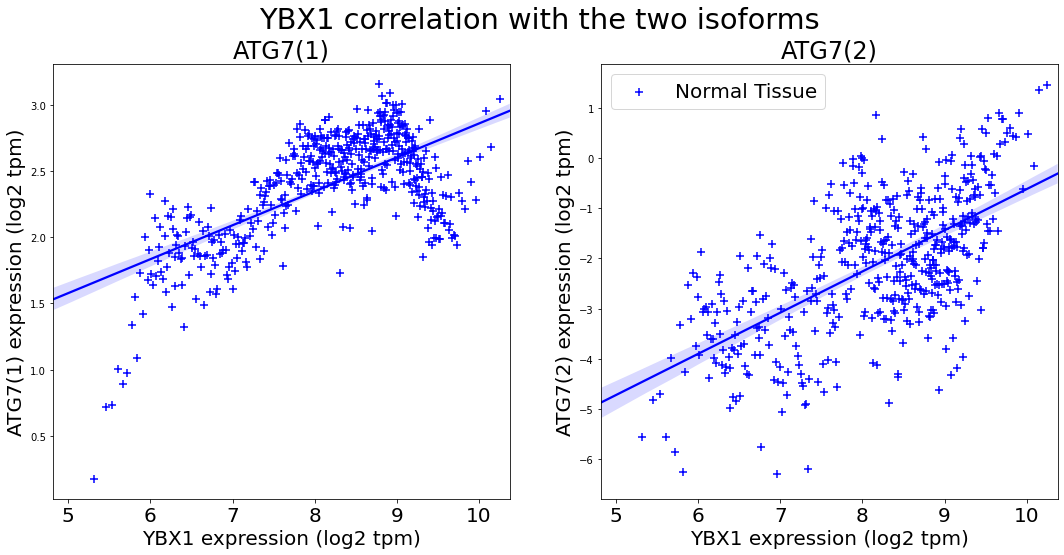

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and YBX1 is: r_value = -0.03 for a p_value of 9.42e-03
  correlation between ATG7_2 and YBX1 is: r_value = 0.23 for a p_value of 5.19e-105


<Figure size 864x576 with 0 Axes>

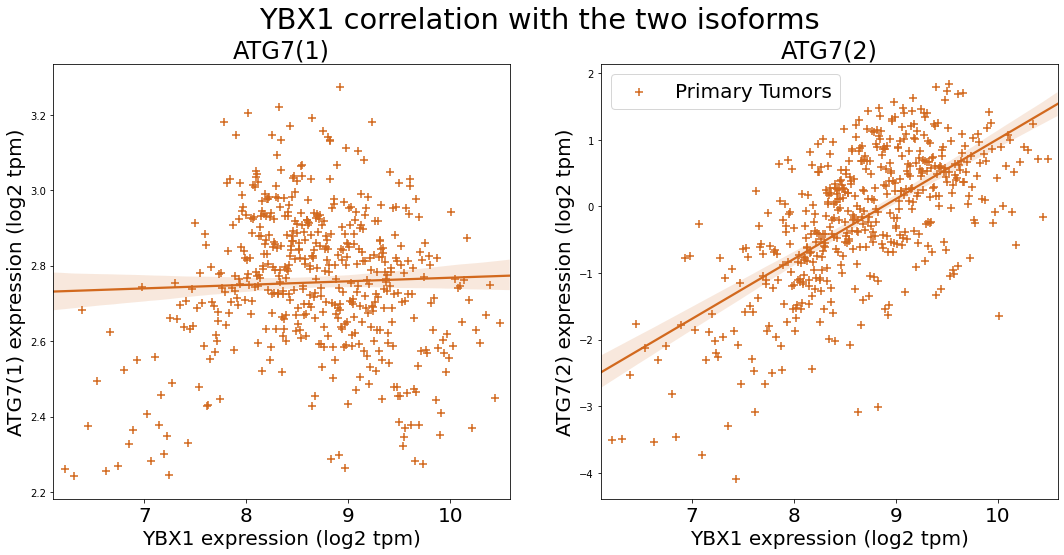


Normal Tissue : (7429, 19387)
 37 are removed from head and tail
 without extremities: (7355, 19387)

Normal Tissue
  correlation between ATG7_1 and TGFB1 is: r_value = 0.41 for a p_value of 8.81e-298
  correlation between ATG7_2 and TGFB1 is: r_value = 0.29 for a p_value of 4.62e-139


<Figure size 864x576 with 0 Axes>

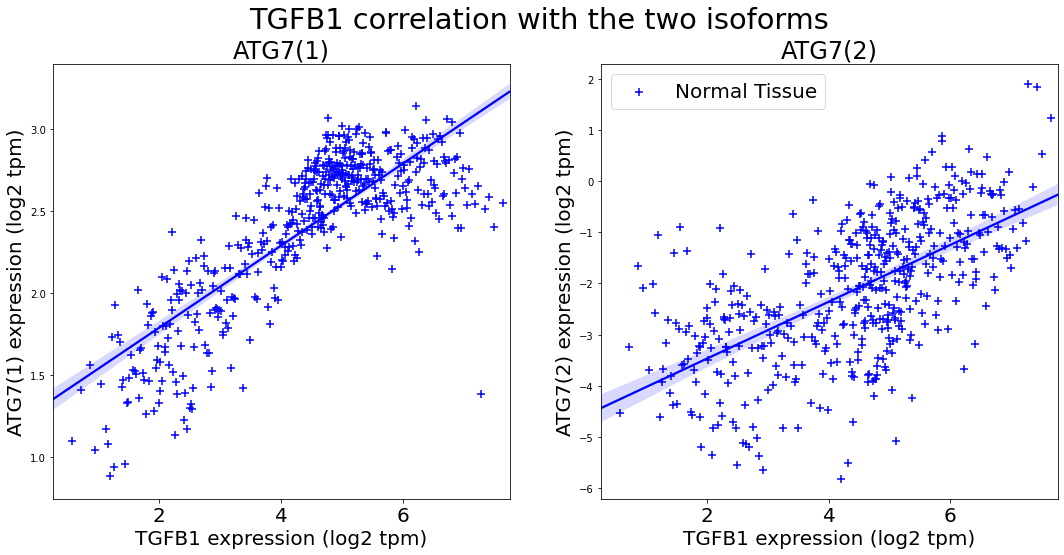

Primary Tumors : (9185, 19387)
 45 are removed from head and tail
 without extremities: (9095, 19387)

Primary Tumors
  correlation between ATG7_1 and TGFB1 is: r_value = 0.13 for a p_value of 2.49e-35
  correlation between ATG7_2 and TGFB1 is: r_value = 0.19 for a p_value of 8.26e-72


<Figure size 864x576 with 0 Axes>

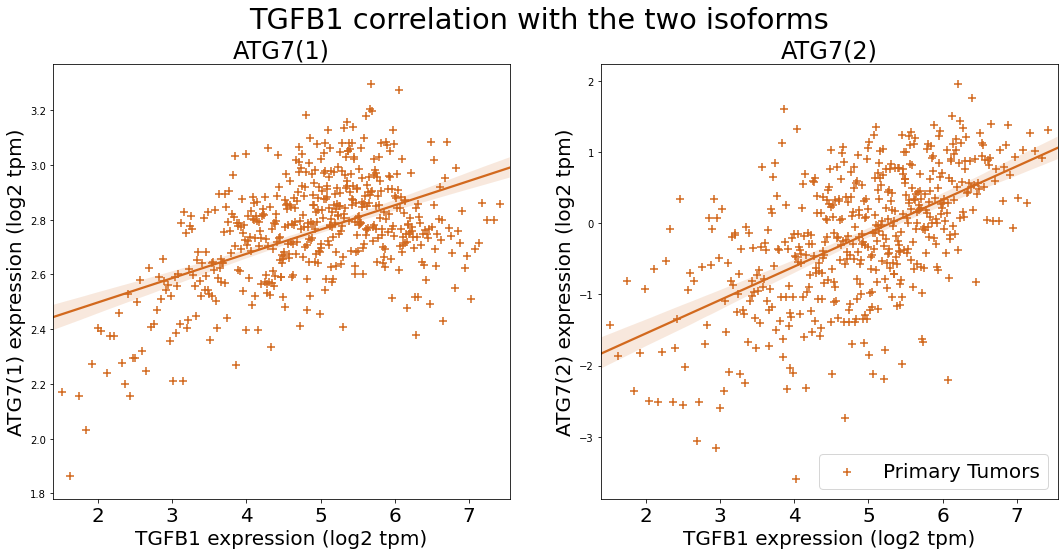

<Figure size 864x576 with 0 Axes>

In [12]:
#Graphic representation, two graphs in one, remove the extremities to have better graph 
all_tissue_used = [[ensembl_normal_atg7_proteinGE,'Normal Tissue', 'blue'], 
                   [ensembl_primary_atg7_proteinGE,'Primary Tumors', 'chocolate']]

HK2 = 'ENSG00000159399'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
MAPK1 = 'ENSG00000100030'
MTDH = 'ENSG00000147649'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'
ATG7 = 'ATG7'
ATG7_1 = 'ATG7_1'
 
genes = [[ATG7,'ATG7'], [ATG7_1,'ATG7_1'], [MAPK1,'MAPK1'], [MTDH,'MTDH'], [KPNA1,'KPNA1'], 
         [TNPO1,'TNPO1'], [HK2,'HK2'], [YAP1,'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], [TGFB1,'TGFB1']]

for gene in genes:
    for df in all_tissue_used:
        #sort by value, remove the extremities
        print(df[1], ':', df[0].shape)
        for_genes = df[0].sort_values([gene[0]], ascending = False) 
        lenght = len(for_genes)
        without_05perc = int(lenght*0.005)
        print('', without_05perc, 'are removed from head and tail')
        without_head = without_05perc
        without_tail = lenght - without_05perc
                
        df_no_extrem = for_genes.iloc[without_head:without_tail,:]
        print(' without extremities:', df_no_extrem.shape)
        print()
        
        x = df_no_extrem[gene[0]].to_list()
        y1 = df_no_extrem['ATG7_1'].to_list()
        y2 = df_no_extrem['ATG7_2'].to_list()
        
        print(df[1])
        r_value, p_value = scipy.stats.spearmanr(x, y1)
        print('  correlation between ATG7_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
        r_value, p_value = scipy.stats.spearmanr(x, y2)
        print('  correlation between ATG7_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
        
        #graph
        fig, ax = plt.subplots(1,2, figsize=(18,8))
        name = gene[1]+ " correlation with the two isoforms"
        name2 = gene[1]+ " expression (log2 tpm)"

        fig.suptitle(name, fontsize="x-large")
 
        fig = seaborn.regplot(x=x,y=y1, ax=ax[0], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
        fig.set_title("ATG7(1)")
#         fig.set_xlim(0,)
        fig.set_xlabel(name2)
#         fig.set_ylim(0,)
        fig.set_ylabel('ATG7(1) expression (log2 tpm)')

        fig = seaborn.regplot(x=x,y=y2, ax=ax[1], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
        fig.set_title("ATG7(2)")
#         fig.set_xlim(0,)
        fig.set_xlabel(name2)
#         fig.set_ylim(0,)
        fig.set_ylabel('ATG7(2) expression (log2 tpm)')
        
        plt.legend()
        plt.show()
        plt.clf()
    print()